# Demo: Estimating a Linear Regression Model

This is just an example of how we might generate a logistic regression model. We're interested in getting parameter weights so we can reimplement the model manually.


### Just learning about the dataset

Before we do any stats we'll want to explore the dataset to find any issues that might come up when picking a model.

This might be something like:
- Multicollinearity
- Heteroskedasticity
- Sparse data (which might require imputation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle


In [2]:
dataset = pd.read_csv('kc_house_data.csv')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

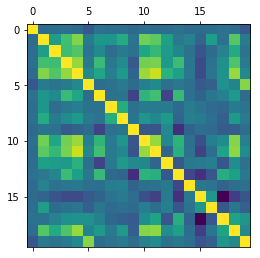

In [5]:
# determine multicollinearity

plt.matshow(dataset.corr())
plt.show()

In [6]:
dataset.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


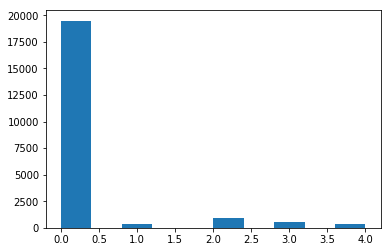

In [7]:
plt.hist(dataset['view'])
plt.show()

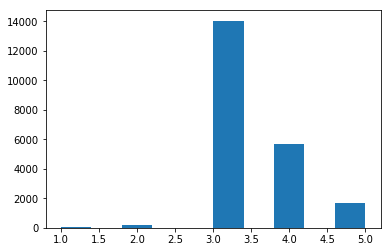

In [8]:
plt.hist(dataset['condition'])
plt.show()

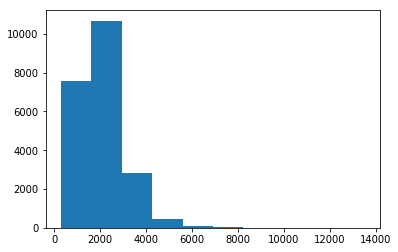

In [9]:
plt.hist(dataset['sqft_living'])
plt.show()

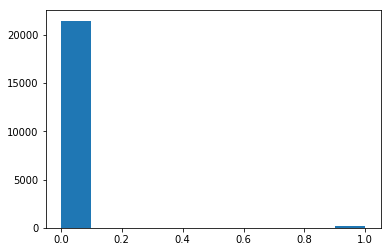

In [10]:
plt.hist(dataset['waterfront'])
plt.show()

### Fit a Model and Test on a Holdout Sample.

In [11]:
# create two subsets of samples.

dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, train_size=0.8)

In [12]:
dataset_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5012,2888000020,20150302T000000,455000.0,5,2.00,2500,7860,1.0,0,0,...,7,1040,1460,1963,0,98034,47.7212,-122.226,2060,9684
20890,7708200880,20140923T000000,562500.0,5,2.75,2920,6327,2.0,0,0,...,8,2920,0,2007,0,98059,47.4935,-122.145,2520,5026
4349,2492200956,20140805T000000,360000.0,3,1.50,1170,4080,1.0,0,0,...,6,1170,0,1917,0,98126,47.5338,-122.381,920,4242
15754,8651611980,20150324T000000,962800.0,4,2.75,3630,11775,2.0,0,0,...,10,3630,0,1999,0,98074,47.6378,-122.066,3800,12451
8835,3992700775,20150121T000000,410000.0,4,2.00,1490,13736,1.0,0,0,...,6,1490,0,1942,0,98125,47.7120,-122.281,2040,7200


In [13]:
dataset_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18458,1928300620,20140608T000000,455000.0,3,1.0,1300,3550,1.5,0,0,...,7,1300,0,1927,0,98105,47.6696,-122.320,1410,4080
19738,9828201361,20141114T000000,299000.0,2,1.5,830,1276,2.0,0,0,...,7,830,0,2005,0,98122,47.6175,-122.297,1540,1484
3145,9274201807,20140820T000000,580000.0,3,2.5,1590,1937,2.5,0,0,...,8,1590,0,2004,0,98116,47.5903,-122.388,1620,2022
12524,2025701530,20140826T000000,282000.0,3,2.5,1610,6000,2.0,0,0,...,7,1610,0,1993,0,98038,47.3490,-122.036,1570,6000
4770,7686202580,20150213T000000,196900.0,3,1.0,1270,7500,1.0,0,0,...,6,1270,0,1954,0,98198,47.4214,-122.316,1250,8000


In [14]:
# Using a real-estate dataset, estimate whether a property is likely to be a waterfront property 
# by using three predictors: Living space (in square feet), the quality of the view, 
# and the condition of the property.
# this isn't really an interesting research question, it's just to demonstrate implementation.

train_y = dataset_train['waterfront']
test_y = dataset_test['waterfront']

In [15]:
train_X = dataset_train[['sqft_living', 'view', 'condition']]
test_X = dataset_test[['sqft_living', 'view', 'condition']]

In [16]:
model = LogisticRegression()

In [17]:
fitted = model.fit(train_X, train_y)

In [18]:
# get R-squared for the model.

model.score(test_X, test_y)

0.99167244968771684

In [19]:
print(fitted.coef_[0])
sqft_coef = fitted.coef_[0][0]
view_coef = fitted.coef_[0][1]
condition_coef = fitted.coef_[0][2]

[ -1.83525095e-04   1.99677398e+00  -3.99600510e-01]


In [25]:
# now get a fitted value.  Check out the predicted probability for a non-waterfront property. 
# demonstrates that the linear combination of values 
# extract the 'sqft_living', 'view', 'condition' variables and put them into a manual equation.

import math

fitted_val = fitted.intercept_ + (sqft_coef * 1180.0) +  (view_coef * 0.0) + (condition_coef * 3.0)
fitted_proba = 1 / (1 + math.exp(-fitted_val))
fitted_proba

0.00034815761054487484

In [42]:
# check the first fitted value.
arr = [
    [1180.0, 0.0, 3.0]
]
model.predict_proba(arr)

array([[  9.99651842e-01,   3.48157611e-04]])

In [32]:
# now check out a second fitted value; this one will be the same as above, 
# but we'll want to pick a value that has waterfront = 1.

fitted_val_wf = fitted.intercept_ + (sqft_coef * 760.0) +  (view_coef * 4.0) + (condition_coef * 5.0)
fitted_proba_wf = 1 / (1 + math.exp(-fitted_val_wf))
fitted_proba_wf

0.3323597291972727

In [41]:
model.predict_proba([[760.0, 4.0, 5.0]])

array([[ 0.66764027,  0.33235973]])

### Export the Estimated Model for Later Use

Having estimated a reasonable model, we might want to use it online, without having to reimplement the model altogether in a separate environment.

We do that by pickling it.


In [24]:
model_file = open('model.p', mode='wb')
pickle.dump(model, model_file)
model_file.flush()

In [43]:
fitted.intercept_

array([-6.54714592])